In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import calendar

plt.rcParams['font.family']='NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.

In [2]:
df = pd.read_csv("end-part2_df.csv")
df.head()

,date,meantempm,maxtempm,mintempm,meantempm_1,meantempm_2,meantempm_3,meandewptm_1,meandewptm_2,meandewptm_3,...,mindewptm_3,maxpressurem_1,maxpressurem_2,maxpressurem_3,minpressurem_1,minpressurem_2,minpressurem_3,precipm_1,precipm_2,precipm_3
0,2015-01-04,-14,-12,-18,-4.0,-6.0,-6.0,-11.0,-9.0,-12.0,...,-18.0,1025.0,1026.0,1025.0,1010.0,1017.0,1019.0,0.76,0.00,0.00
1,2015-01-05,-9,-3,-14,-14.0,-4.0,-6.0,-19.0,-11.0,-9.0,...,-13.0,1043.0,1025.0,1026.0,1023.0,1010.0,1017.0,0.25,0.76,0.00
2,2015-01-06,-10,-6,-14,-9.0,-14.0,-4.0,-14.0,-19.0,-11.0,...,-16.0,1043.0,1043.0,1025.0,1023.0,1023.0,1010.0,0.00,0.25,0.76
3,2015-01-07,-16,-12,-19,-10.0,-9.0,-14.0,-15.0,-14.0,-19.0,...,-23.0,1043.0,1043.0,1043.0,1027.0,1023.0,1023.0,0.00,0.00,0.25
4,2015-01-08,-7,2,-16,-16.0,-10.0,-9.0,-22.0,-15.0,-14.0,...,-17.0,1055.0,1043.0,1043.0,956.0,1027.0,1023.0,0.00,0.00,0.00


In [3]:
df["year"] = df["date"].apply(lambda x: x.split("-")[0])
df["month"] = df["date"].apply(lambda x: x.split("-")[1]).astype("int")
df_2016 = df.loc[df["year"] == "2016"]

In [4]:
df_2016_temp = df_2016[["month", "meantempm"]]
df_2016_temp.head()

,month,meantempm
362,1,-2
363,1,-3
364,1,-4
365,1,-5
366,1,-1


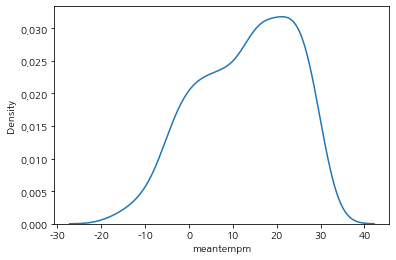

In [5]:
import seaborn as sns

fig, ax = plt.subplots()
sns.kdeplot(df_2016_temp["meantempm"], ax=ax)
fig.savefig("41_subplots_01.png")

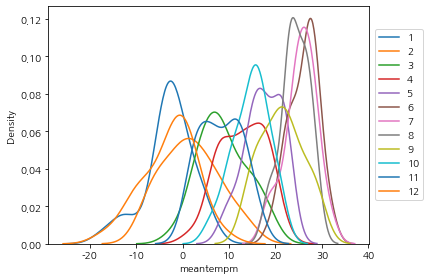

In [6]:
fig, ax = plt.subplots()

for i in range(1, 13):
    sns.kdeplot(df_2016_temp["meantempm"].loc[df_2016_temp["month"] == i], ax=ax, label=f"{i}")
fig.legend(bbox_to_anchor=(1,0.9))
fig.tight_layout(rect=[0,0,0.9,1])
fig.savefig("41_subplots_02.png")

Jan: ymin=0.00000000, ymax=0.09111372
Feb: ymin=0.00000000, ymax=0.09111372
Mar: ymin=0.00000000, ymax=0.09111374
Apr: ymin=0.00000000, ymax=0.09111374
May: ymin=0.00000000, ymax=0.09111374
Jun: ymin=0.00000000, ymax=0.12619650
Jul: ymin=0.00000000, ymax=0.12619650
Aug: ymin=0.00000000, ymax=0.12662445
Sep: ymin=0.00000000, ymax=0.12662445
Oct: ymin=0.00000000, ymax=0.12662445
Nov: ymin=0.00000000, ymax=0.12662445
Dec: ymin=0.00000000, ymax=0.12662472


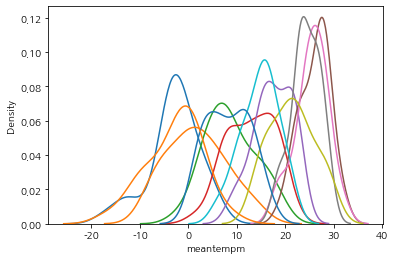

In [7]:
for month in range(1, 13):
    temp_month = df_2016_temp["meantempm"].loc[df_2016_temp["month"] == month]
    g = sns.kdeplot(temp_month)
    ymin, ymax = g.axes.get_ylim()
    print(f"{calendar.month_abbr[month]}: ymin={ymin:0.8f}, ymax={ymax:0.8f}")

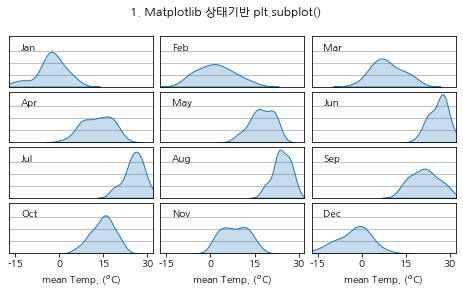

In [77]:
# 1. matplotlib state-based

# x, y 범위를 데이터의 최대값과 최소값으로 조정. 그림을 그리기 전에 미리 알고 있어야 함.
# x 범위
temp_max = df_2016_temp["meantempm"].max()
temp_min = df_2016_temp["meantempm"].min()
# y 범위 : seaborn 결과에서 객체지향 기법을 통해서 추출해야 함. 
#         그렇지 않으면 trial and error로 y범위를 설정해야 함.
ymin = np.inf
ymax = -np.inf
for month in range(1, 13):
    temp_month = df_2016_temp["meantempm"].loc[df_2016_temp["month"] == month]
    g = sns.kdeplot(temp_month)
    ymin_, ymax_ = g.axes.get_ylim()
    if ymin_ < ymin:
        ymin = ymin_
    if ymax_ > ymax:
        ymax = ymax_
    plt.close()

# figure size 지정
plt.figure(figsize=(8, 4))

for i in range(4):
    for j in range(3):
        month = i*3 + j + 1    # 월 이름
        temp_month = df_2016_temp["meantempm"].loc[df_2016_temp["month"] == month]    # 월별 데이터
        
        # plot 공간 생성
        plt.subplot(4, 3, month)
            
        # 데이터 분포를 밀도함수로 표현
        sns.kdeplot(temp_month, fill=True, zorder=2)  # kdeplot은 바로 앞에 있는 subplot에 그려짐.
                                                      # kdeplot에 zorder가 없어 grid 위에 그릴 수 없음.
        plt.xlim(temp_min, temp_max)
        plt.ylim(ymin, ymax)
        
        plt.text(-13, 0.09, calendar.month_abbr[month])  # pyplot에서 subplot 내부 비율에 맞추는 방법을 찾지 못함.
                                                        # 데이터 좌표로 입력 : 데이터가 바뀌면 좌표를 바꿔줘야 함.
        
        # 눈금 위치 지정: grid를 그릴 seed, 눈금 제거
        plt.yticks(ticks=[0, 0.03, 0.06, 0.09], labels=[])
        # 가로선 grid 생성
        plt.grid(axis="y", zorder=1)
        # y축 label 제거
        plt.ylabel("")
        # 눈금 제거 (길이를 0으로 만들어서 안보이게)
        plt.tick_params(axis="y", length=0)
    
        # 맨 아래 axes에만 x축 눈금과 label남김
        if i == 3:
            plt.xticks(ticks=[-15, 0, 15, 30], labels=["-15", "0", "15", "30"])
            plt.xlabel("mean Temp. ($^o$C)")
        # 나머지 axes는 x축 눈금과 label 제거
        else:
            plt.xticks(ticks=[-15, 0, 15, 30], labels=[])
            plt.xlabel("")
            plt.tick_params(axis="x", length=0)
        
plt.suptitle("1. Matplotlib 상태기반 plt.subplot()")    
# subplots 사이 간격 조정    
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.savefig("41_subplots_03.png")

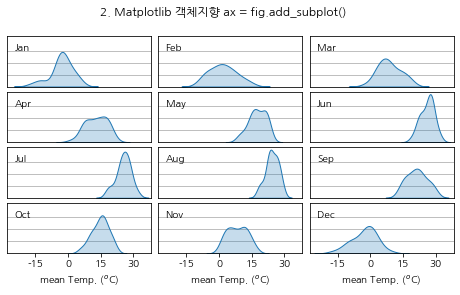

In [76]:
# 2. matplotlib object-oriented, ax.add_subplot()

# figure 생성
fig = plt.figure(figsize=(8, 4))

# axes list 생성
axs = []

for i in range(4):
    for j in range(3):
        month = i*3 + j + 1    # 월 이름
        temp_month = df_2016_temp["meantempm"].loc[df_2016_temp["month"] == month]    # 월별 데이터
        
        # axes 생성
        ax = fig.add_subplot(4, 3, month)
        """
        # Alternative
        # xlim, ylim은 쉽게 통일되지만 ticklabels가 모두 사라짐.
        
        if month == 1:
            ax = fig.add_subplot(4, 3, month)
        else:
            ax = fig.add_subplot(4, 3, month, sharex=axs[0], sharey=axs[0])
        """
            
        # 데이터 분포를 밀도함수로 표현
        sns.kdeplot(temp_month, fill=True, ax=ax, zorder=2)  # kdeplot에 zorder가 없어 grid 위에 그릴 수 없음.
        
        # 화면 왼쪽 위에 월 이름을 약자로 표시
        ax.text(0.05, 0.7, calendar.month_abbr[month], transform=ax.transAxes)
        
        # 눈금 위치 지정: grid를 그릴 seed
        ax.set_yticks([0, 0.03, 0.06, 0.09])
        # 가로선 grid 생성
        ax.grid(axis="y", zorder=1)
        # 눈금 숫자 제거
        ax.set_yticklabels([])
        # y축 label 제거
        ax.set_ylabel("")
        # 눈금 제거 (길이를 0으로 만들어서 안보이게)
        ax.tick_params(axis="y", length=0)
    
        # 맨 아래 axes에만 x축 눈금과 label남김
        if i == 3:
            ax.set_xticks([-15, 0, 15, 30])
            ax.set_xticklabels(["-15", "0", "15", "30"])
            ax.set_xlabel("mean Temp. ($^o$C)")
        # 나머지 axes는 x축 눈금과 label 제거
        else:
            ax.set_xticklabels([])
            ax.set_xlabel("")
            ax.tick_params(axis="x", length=0)
        
        # axes list에 ax 추가
        axs.append(ax)
        
# x, y 범위를 데이터의 최대값과 최소값으로 조정
# 1번 방법과 같이 미리 구해도 되고 그래프를 그린 뒤에 구할 수도 있음.
xmin, xmax = np.inf, -np.inf
ymin, ymax = np.inf, -np.inf

for ax in axs:
    xmin_, xmax_ = ax.get_xlim()
    ymin_, ymax_ = ax.get_ylim()
    
    if xmin_ < xmin:
        xmin = xmin_
    if xmax_ > xmax:
        xmax = xmax_
    if ymin_ < ymin:
        ymin = ymin_
    if ymax_ > ymax:
        ymax = ymax_

for ax in axs:
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

fig.suptitle("2. Matplotlib 객체지향 ax = fig.add_subplot()")    
# subplots 사이 간격 조정    
fig.subplots_adjust(wspace=0.05, hspace=0.1)

fig.savefig("41_subplots_04.png")

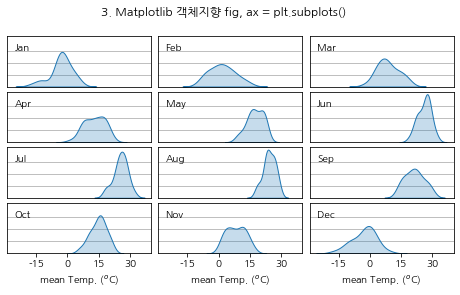

In [75]:
# 3. matplotlib object-oriented, plt.subplots()

# figure와 axes 동시 생성
fig, axes = plt.subplots(ncols=3, nrows=4, figsize=(8, 4), # 행 수, 열 수 지정, 크기 지정
                         gridspec_kw={"wspace":0.05, "hspace":0.1}, # subplots 사이 간격 지정
                         sharex=True, sharey=True)  # subplots간 xlim, ylim 통일

# axes를 1D array로 변형 : for loop을 한 번만 사용해도 됨.
axs = axes.ravel()

for month, ax in enumerate(axs, 1): # axs 전체를 looping. 
                                    # month는 enumerate로 생성.
    temp_month = df_2016_temp["meantempm"].loc[df_2016_temp["month"] == month]    # 월별 데이터
    
    # 데이터 분포를 밀도함수로 표현
    sns.kdeplot(temp_month, fill=True, ax=ax, zorder=2)  # kdeplot에 zorder가 없어 grid 위에 그릴 수 없음.
    
    # 화면 왼쪽 위에 월 이름을 약자로 표시
    ax.text(0.05, 0.7, calendar.month_abbr[month], transform=ax.transAxes)

    # 눈금 위치 지정: grid를 그릴 seed
    ax.set_yticks([0, 0.03, 0.06, 0.09])
    # 가로선 grid 생성
    ax.grid(axis="y", zorder=1)
    # 눈금 숫자 제거
    ax.set_yticklabels([])
    # y축 label 제거
    ax.set_ylabel("")
    # 눈금 제거 (길이를 0으로 만들어서 안보이게)
    ax.tick_params(axis="y", length=0)
    
    # 맨 아래 axes에만 x축 눈금과 label남김
    if month >= 10:  # subplot 좌표가 아니라 month로 제어
        ax.set_xticks([-15, 0, 15, 30])
        ax.set_xticklabels(["-15", "0", "15", "30"])
        ax.set_xlabel("mean Temp. ($^o$C)")
    # 나머지 axes는 x축 눈금과 label 제거
    else:
        ax.set_xticklabels([])
        ax.set_xlabel("")
        ax.tick_params(axis="x", length=0)
        
fig.suptitle("3. Matplotlib 객체지향 fig, ax = plt.subplots()")    
fig.savefig("41_subplots_05.png")

In [11]:
# 4. seaborn FacetGrid()

# FacetGrid()를 사용하기 위한 데이터 수정
df_2016_temp["col"] = df_2016_temp["month"].apply(lambda x: (x-1) % 3)
df_2016_temp["row"] = df_2016_temp["month"].apply(lambda x: (x-1) // 3)
display(df_2016_temp.groupby("month").mean())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,meantempm,col,row
month,,,
1,-2.935484,0.0,0.0
2,1.724138,1.0,0.0
3,8.709677,2.0,0.0
4,12.933333,0.0,1.0
5,17.500000,1.0,1.0
6,26.100000,2.0,1.0
7,25.483871,0.0,2.0
8,24.290323,1.0,2.0
9,21.333333,2.0,2.0


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)


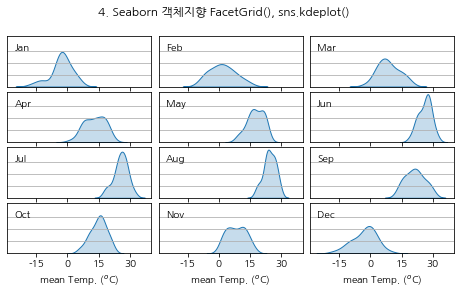

In [63]:
# FacetGrid()를 이용해 데이터 기반 subplots 생성
g = sns.FacetGrid(df_2016_temp, row="row", col="col", height=1, aspect=2.67,  # row와 col에 들어갈 데이터, 개별 subplot 크기 설정
                  sharex=True, sharey=True,                    # subplots간 xlim, ylim 통일
                  despine=False,                               # spines 모두 보이게 설정
                  gridspec_kws={"wspace":0.05, "hspace":0.1})  # subplots 사이 간격 지정

# 데이터 분포를 밀도함수로 표현
g.map(sns.kdeplot, "meantempm", fill=True)

# FacetGrid에서 axes 추출
axes = g.axes
# axes를 1D array로 변형 : for loop을 한 번만 사용해도 됨.
axs = axes.ravel()

# axes에 꾸밈 설정
for month, ax in enumerate(axs, 1):
    # FacetGrid가 자동적으로 만드는 title 삭제
    ax.set_title("")
    # 화면 왼쪽 위에 월 이름을 약자로 표시
    ax.text(0.05, 0.7, calendar.month_abbr[month], transform=ax.transAxes)
    
    # x축 범위와 label 설정
    ax.set_xticks([-15, 0, 15, 30])
    ax.set_xticklabels(["-15", "0", "15", "30"])
    # y축 범위와 label 설정
    ax.set_yticks([0, 0.03, 0.06, 0.09])
    ax.set_yticklabels([])
    
    # 가로선 grid 생성
    ax.grid(axis="y")
    
    # y축 눈금 제거 (길이를 0으로 만들어서 안보이게)
    ax.tick_params(axis="y", length=0)
    
    # xlabel, ylabel 설정
    g.set_axis_labels("mean Temp. ($^o$C)", "")

g.fig.suptitle("4. Seaborn 객체지향 FacetGrid(), sns.kdeplot()")    
g.fig.savefig("41_subplots_06.png")    